In [239]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import geopandas
from tqdm import tqdm
import missingno as msn
from sklearn.impute import KNNImputer

In [216]:
path = '/home/arianna/Desktop/MICRODATI/AVQ_Microdati_2020.txt'
df = pd.read_csv(path, delimiter='\t', low_memory=False, decimal='.')
df

,PROFAM,PROIND,NCOMP,ANNO,RELPAR,ETAMi,SESSO,STCIVMi,STCPM,AMATR,...,MOTNOAI1,MOTNOAI3,MOTNOAI4,MOTNOAI5,MOTNOAI6,MOTNOAI8,MOTNOAI10,MOTNOAI9,SITE,RISEC
0,1,1,4,2020,1,9,2,2,1,2010,...,,,,,,,,,4,3
1,1,2,4,2020,6,2,2,,,,...,,,,,,,,,4,3
2,1,3,4,2020,6,1,2,,,,...,,,,,,,,,4,3
3,1,4,4,2020,2,9,1,2,1,2010,...,,,,,,,,,4,3
4,2,1,3,2020,1,13,1,2,1,1983,...,,,,,,,,,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42805,18525,1,3,2020,1,12,2,2,1,1982,...,,,,,,,,,3,2
42806,18525,2,3,2020,2,13,1,2,1,1982,...,,,,,,,,,3,2
42807,18525,3,3,2020,6,9,1,1,,,...,,,,,,,,,3,2
42808,18526,1,1,2020,1,12,1,1,,,...,,,,,,,,,4,2


,number_of_people
age_between_11-13,0.083573
age_between_14-15,0.084397
age_between_16-17,0.090675
age_between_18-19,0.122067
age_between_20-24,0.204611
age_between_25-34,0.414677


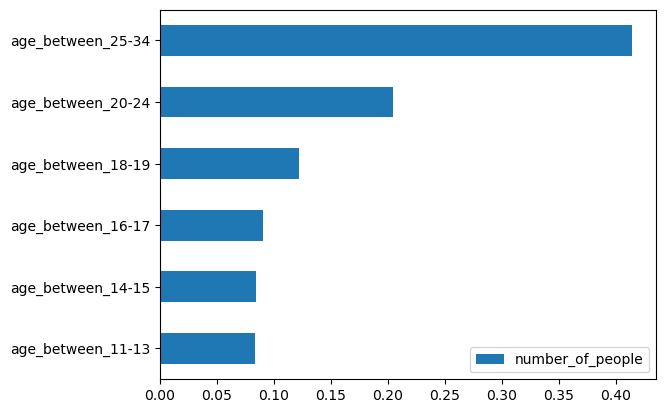

In [217]:
eta_compresa = df[df.ETAMi.between(4,9)]
#plt.hist(eta_compresa.ETAMi)
#plt.show()
len(eta_compresa)
eta_people = pd.value_counts(eta_compresa.ETAMi, ascending=True, dropna=True, normalize=True)
plot_data= pd.DataFrame(
    { 'number_of_people': eta_people.values},
    index=['age_between_11-13', 'age_between_14-15', 'age_between_16-17', 'age_between_18-19', 'age_between_20-24', 'age_between_25-34'])
display(plot_data)
plot_data.plot(kind='barh')
plt.show()

In [218]:
type(list(range(6)))
new_db= eta_compresa.iloc[:,list([2,5,6, 37,38,39,44,103,104 ])+list(range(145,173))+list([174,183,184,188])]
new_db

,NCOMP,ETAMi,SESSO,LEZPR,INFOR,LING,MMSCLA,SPOCON,SPOSAL,BIRRA,...,FUMO,FRFUMO,TFUMO,NSIGARM,SALUTE,CRONI,DIAB,FEGATO,CIRRO,NEURO
0,4,9,2,1,1,1,15,1,1,6,...,3,,,,2,1,1,3,5,5
3,4,9,1,1,1,1,99,1,2,1,...,1,1,3,17,2,1,1,3,5,5
6,3,9,2,1,1,4,50,2,,6,...,3,,,,2,1,1,3,5,5
8,3,8,2,1,1,1,,1,1,6,...,3,,,,2,1,1,3,5,5
9,3,7,2,1,1,1,23,1,1,6,...,3,,,,2,1,1,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42786,3,9,2,1,1,1,10,1,1,6,...,1,1,3,12,2,1,1,3,5,5
42788,3,9,1,1,1,1,20,1,1,2,...,1,1,3,16,1,1,1,3,5,5
42790,3,8,1,1,1,1,30,2,,4,...,1,1,3,10,2,1,1,3,5,5
42802,1,9,1,1,1,1,99,1,1,4,...,1,1,3,17,2,1,1,3,5,5


In [219]:
def convert_string_into_files(columns):
    '''
    Passo una colonna alla funzione che permette di convertire le stringhe contenute in numeri o in valori None.
    '''
    new = columns
    for num, k in enumerate(columns):
        if k.strip():
            new[num]=int(k)
        else:
            new[num]=None
    return new

In [220]:
my_str=list([' ', '1', '2'])
print(convert_string_into_files(my_str))
new = my_str
#for num, k in enumerate(my_str):
    #print(num)
 #   if k.strip():
 #       new[num]=int(k)
  #  else:
   #     new[num]=None

#print(new)

[None, 1, 2]


In [224]:
final_db=new_db
for i in new_db.columns:
    if type(new_db[i][0]) is str:
        final_db[i]=convert_string_into_files(list(new_db[i].values))
    
final_db

,NCOMP,ETAMi,SESSO,LEZPR,INFOR,LING,MMSCLA,SPOCON,SPOSAL,BIRRA,...,FUMO,FRFUMO,TFUMO,NSIGARM,SALUTE,CRONI,DIAB,FEGATO,CIRRO,NEURO
0,4,9,2,1.0,1.0,1.0,15.0,1.0,1.0,6.0,...,3.0,NaN,NaN,NaN,2,1.0,1.0,3.0,5.0,5.0
3,4,9,1,1.0,1.0,1.0,99.0,1.0,2.0,1.0,...,1.0,1.0,3.0,17.0,2,1.0,1.0,3.0,5.0,5.0
6,3,9,2,1.0,1.0,4.0,50.0,2.0,NaN,6.0,...,3.0,NaN,NaN,NaN,2,1.0,1.0,3.0,5.0,5.0
8,3,8,2,1.0,1.0,1.0,NaN,1.0,1.0,6.0,...,3.0,NaN,NaN,NaN,2,1.0,1.0,3.0,5.0,5.0
9,3,7,2,1.0,1.0,1.0,23.0,1.0,1.0,6.0,...,3.0,NaN,NaN,NaN,2,1.0,1.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42786,3,9,2,1.0,1.0,1.0,10.0,1.0,1.0,6.0,...,1.0,1.0,3.0,12.0,2,1.0,1.0,3.0,5.0,5.0
42788,3,9,1,1.0,1.0,1.0,20.0,1.0,1.0,2.0,...,1.0,1.0,3.0,16.0,1,1.0,1.0,3.0,5.0,5.0
42790,3,8,1,1.0,1.0,1.0,30.0,2.0,NaN,4.0,...,1.0,1.0,3.0,10.0,2,1.0,1.0,3.0,5.0,5.0
42802,1,9,1,1.0,1.0,1.0,99.0,1.0,1.0,4.0,...,1.0,1.0,3.0,17.0,2,1.0,1.0,3.0,5.0,5.0


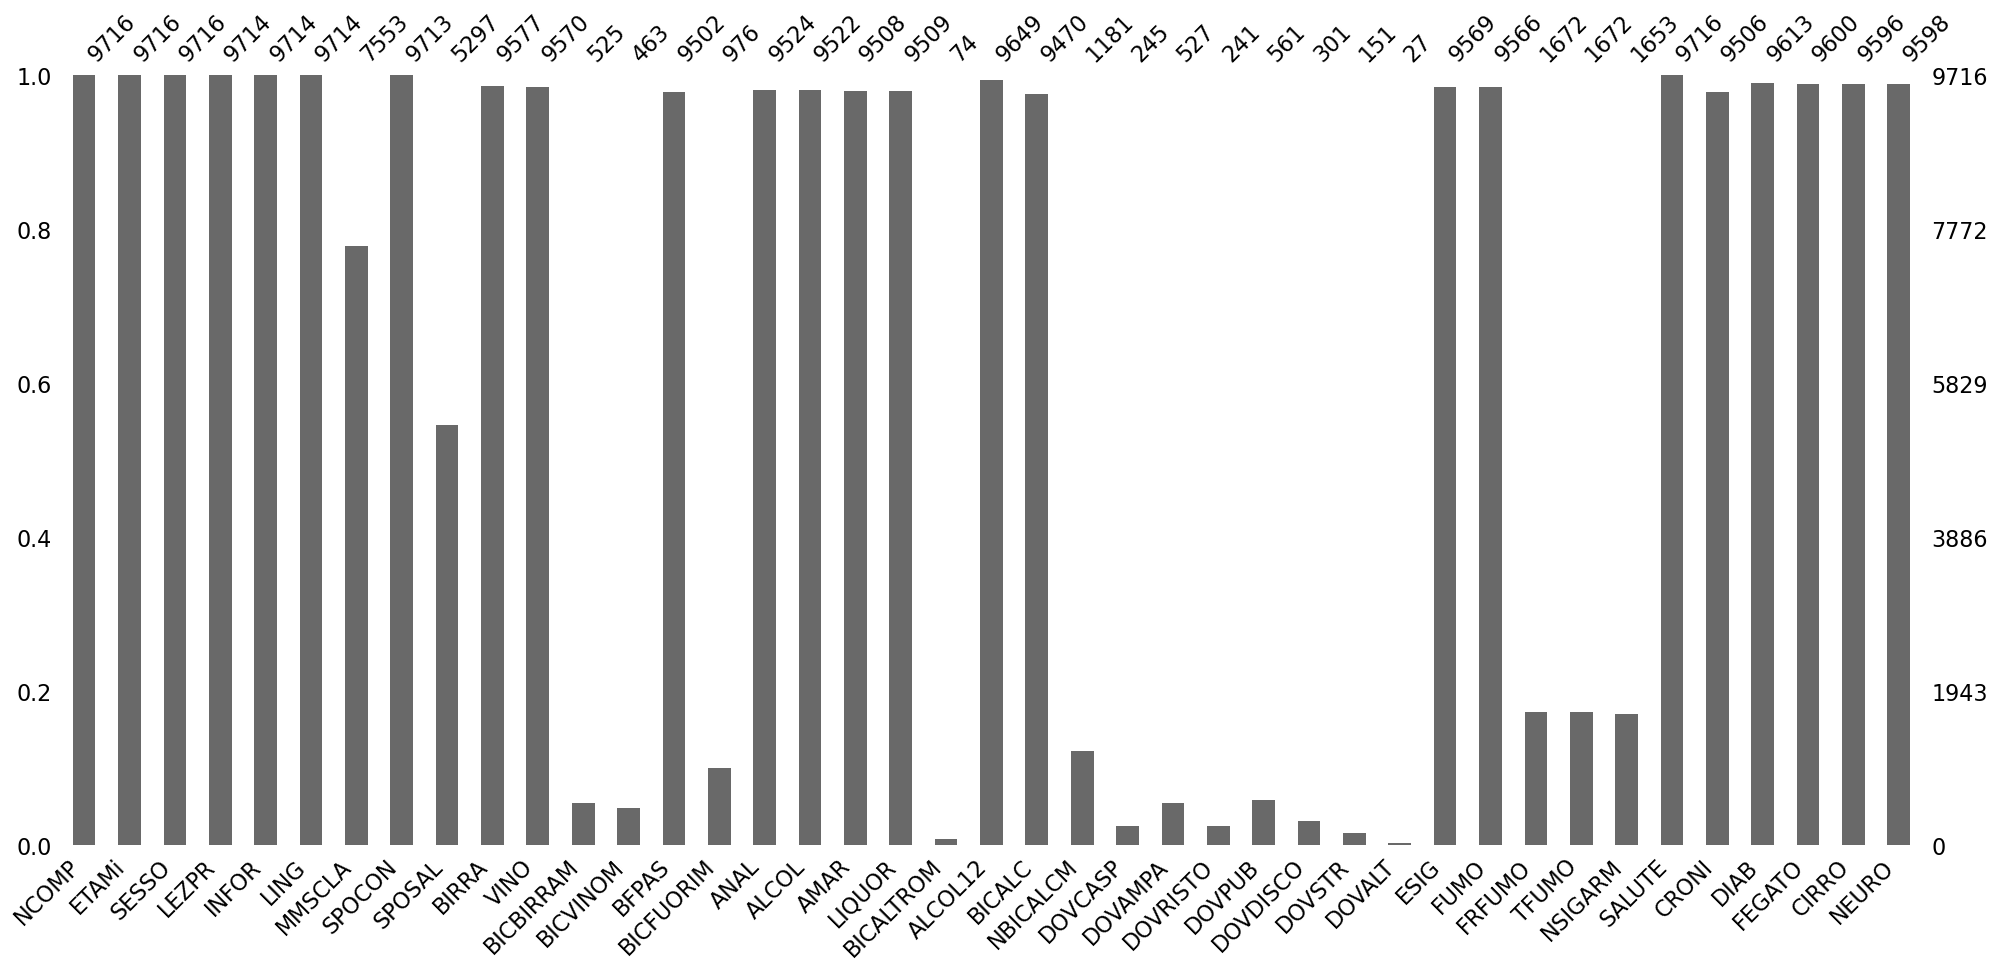

In [225]:
msn.bar(final_db)
plt.show()

In [233]:
for c in final_db.columns:
    for r in final_db[c]:
        if type(r) is str :
            print(c, r)

In [240]:
def knn_imputer(df:pd.DataFrame, neighbours:int=5)->pd.DataFrame:
    return pd.DataFrame(
        KNNImputer(n_neighbors=neighbours).fit_transform(df.values),
        columns=df.columns,
        index=df.index
    )

In [245]:
db_imputer= knn_imputer(final_db) #-> dati imputati

In [247]:
assert(db_imputer.isna().values.sum()==0)

In [249]:
db_imputer.to_csv("database_imputato.csv")
final_db.to_csv("database_ripulito.csv")